<a href="https://colab.research.google.com/github/PhongLNA/Hair-health/blob/master/Luke_hairfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Thư viện**

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



---

#**Dữ liệu đầu vào**

In [70]:
raw_df = pd.read_csv('/content/drive/MyDrive/PTDL/Luke_hair_loss_documentation.csv')

Các thuộc tính trong bộ dữ liệu:

date(dd/mm/yyyy): ngày

**hair_loss: mức độ rụng tóc(4 mức độ)**

stay_up_late: số giờ thức khuya

pressure_level: mức độ áp lực

coffee_consumed: số tách cà phê tiêu thụ trong 1 ngày

brain_work_duration: số giờ làm các công viên đòi hỏi vận động trí óc

school_assessment: bài tập

stress_level: mức độ stress

shampoo_brand: nhãn hiệu dầu gội

swimming: có bơi hay không

hair_washing: có gội đầu hay không

hair_grease: mức độ dầu nhờn trên tóc

dandruff: mức độ gàu trên tóc

libido: mức độ ham muốn tình dục

In [71]:
raw_df.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/01/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/01/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2


In [72]:
raw_df.tail()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
395,31/01/2022,Medium,1,Low,1,2,NaN,Low,Hair & Shoulder,No,N,1.0,NaN,5
396,1/02/2022,Few,1,Low,0,3,NaN,Low,Hair & Shoulder,Yes,Y,2.0,NaN,1
397,2/02/2022,Medium,1,Low,1,1,NaN,Low,Hair & Shoulder,No,N,2.0,NaN,5
398,3/02/2022,Medium,0,Low,1,1,NaN,Low,Hair & Shoulder,No,N,2.0,NaN,5
399,4/02/2022,Few,1,Low,0,2,NaN,Low,Hair & Shoulder,Yes,Y,2.0,NaN,1


In [73]:
print('Số Instance',raw_df.shape[0])
print('Số Atribute', raw_df.shape[1])

Số Instance 400
Số Atribute 14


Các giá trị có mặt trong từng thuộc tính

In [74]:
for i in raw_df.iloc[:, 1:]:
    print(f'{i}: {raw_df[i].unique()}\n')

hair_loss: ['Few' 'Medium' 'Many' 'A lot']

stay_up_late: [2 0 3 1 4 5 6 8]

pressure_level: ['Low' 'Medium' 'High' 'Very High']

coffee_consumed: [ 0  1  2  3  4  5  6  7  8  9 10]

brain_working_duration: [ 1  3  0  2  6  7  5  8  9 10 12 13 16 18 11]

school_assesssment: [nan 'Individual ass' 'Team ass' 'Final exam revision' 'Final exam']

stress_level: ['Low' 'Medium' 'High' 'Very High']

shampoo_brand: ['Pantene' 'Hair & Shoulder']

swimming: ['No' 'Yes']

hair_washing: ['Y' 'N']

hair_grease: [ 3.  1.  2.  4.  5. nan]

dandruff: [nan 'Few' 'Many']

libido: [1 2 3 4 5 0]



In [75]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [76]:
raw_df['hair_loss'].value_counts()

,count
hair_loss,
Few,169
Medium,167
Many,42
A lot,22


Kiếm tra giá trị trống

In [77]:
raw_df.isnull().sum()

,0
date,0
hair_loss,0
stay_up_late,0
pressure_level,0
coffee_consumed,0
brain_working_duration,0
school_assesssment,305
stress_level,0
shampoo_brand,0
swimming,0


Điền giá trị trống

In [78]:
raw_df[['school_assesssment', 'dandruff']] = raw_df[['school_assesssment', 'dandruff']].fillna('No_data')
raw_df['hair_grease'] = raw_df['hair_grease'].fillna(0)

In [79]:
for i in raw_df[['school_assesssment', 'dandruff','hair_grease']]:
    print(f'{i}: {raw_df[i].unique()}\n')

school_assesssment: ['No_data' 'Individual ass' 'Team ass' 'Final exam revision' 'Final exam']

dandruff: ['No_data' 'Few' 'Many']

hair_grease: [3. 1. 2. 4. 5. 0.]



In [80]:
raw_df.isnull().sum()

,0
date,0
hair_loss,0
stay_up_late,0
pressure_level,0
coffee_consumed,0
brain_working_duration,0
school_assesssment,0
stress_level,0
shampoo_brand,0
swimming,0


In [81]:
raw_df['hair_grease'] = raw_df['hair_grease'].astype('int64')

In [82]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    400 non-null    object
 1   hair_loss               400 non-null    object
 2   stay_up_late            400 non-null    int64 
 3   pressure_level          400 non-null    object
 4   coffee_consumed         400 non-null    int64 
 5   brain_working_duration  400 non-null    int64 
 6   school_assesssment      400 non-null    object
 7   stress_level            400 non-null    object
 8   shampoo_brand           400 non-null    object
 9   swimming                400 non-null    object
 10  hair_washing            400 non-null    object
 11  hair_grease             400 non-null    int64 
 12  dandruff                400 non-null    object
 13  libido                  400 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 43.9+ KB


Kiểm tra trùng

In [83]:
raw_df.duplicated().sum()

0

In [84]:
df = raw_df.copy()

In [85]:
df.to_csv("luke.csv",index = False)



---

#**EDA**

## Label hair_loss

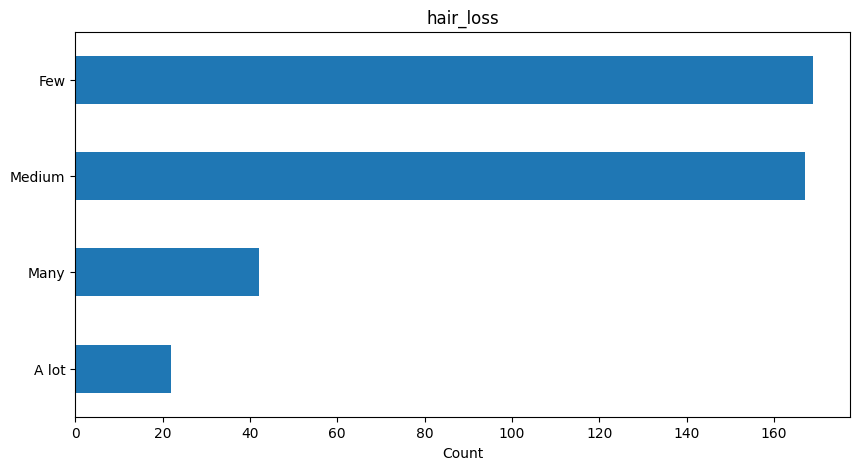

In [17]:
plt.figure(figsize=(10, 5))
(df['hair_loss'].value_counts().sort_values(ascending=True)).plot(kind='barh')
plt.title('hair_loss')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

## date

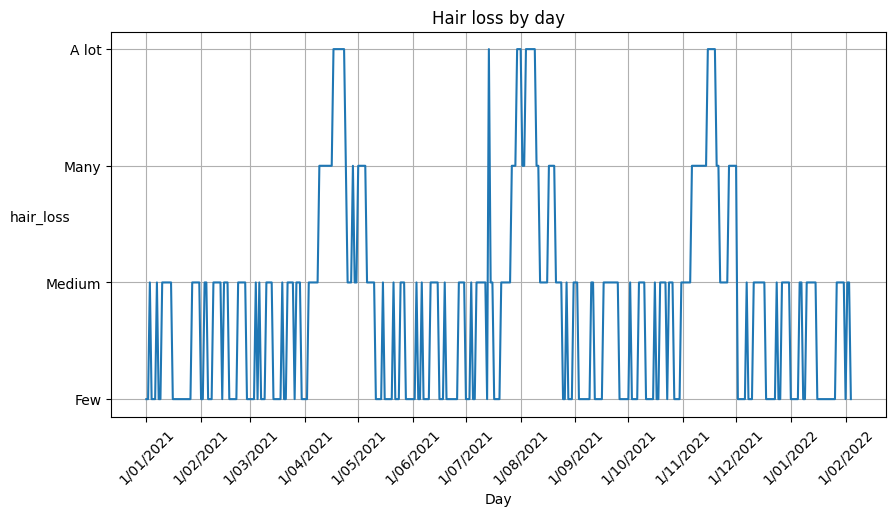

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['hair_loss'], linestyle='-')
plt.title('Hair loss by day')
plt.xlabel('Day')
plt.ylabel('hair_loss',rotation=0)
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()

## stay_up_late

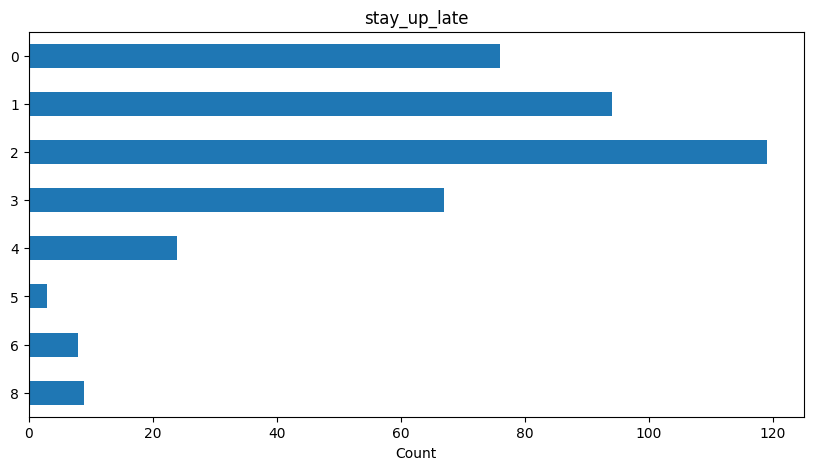

In [19]:
plt.figure(figsize=(10, 5))
(df['stay_up_late'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('stay_up_late')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

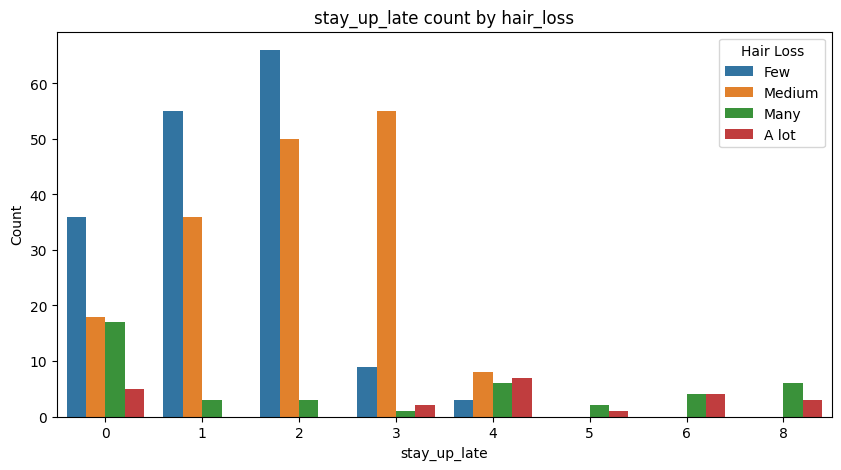

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['stay_up_late'],hue=df['hair_loss'])
plt.title('stay_up_late count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('stay_up_late')
plt.ylabel('Count')

plt.show()

## pressure_level

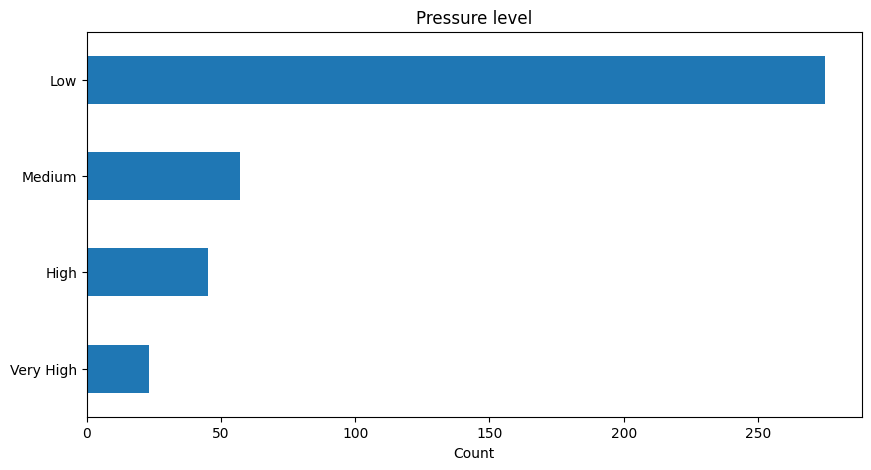

In [21]:
plt.figure(figsize=(10, 5))
(df['pressure_level'].value_counts().sort_values(ascending=True)).plot(kind='barh')
plt.title('Pressure level')
plt.ylabel('')
plt.xlabel('Count')

plt.show()

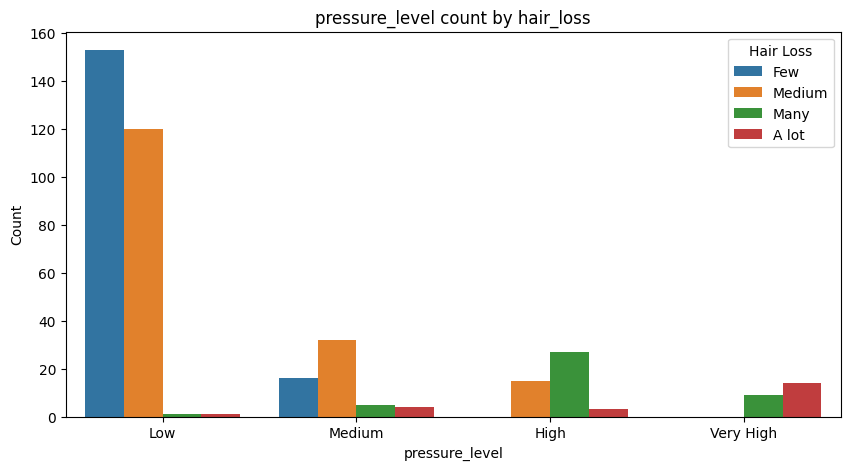

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pressure_level'],hue=df['hair_loss'])
plt.title('pressure_level count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('pressure_level')
plt.ylabel('Count')

plt.show()

## coffee_consumed

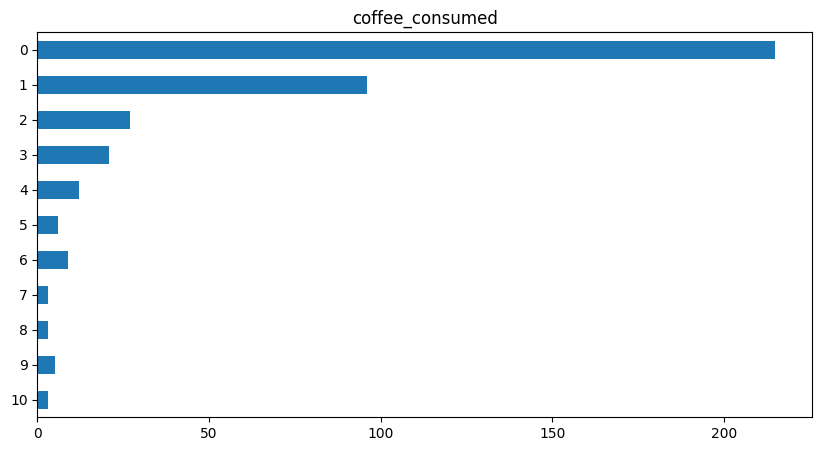

In [23]:
plt.figure(figsize=(10, 5))
(df['coffee_consumed'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('coffee_consumed')
plt.ylabel('')

plt.show()

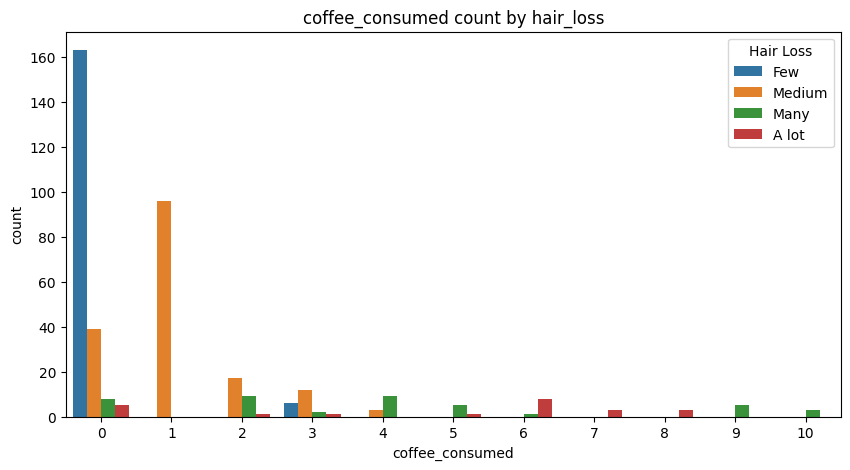

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['coffee_consumed'],hue=df['hair_loss'])
plt.title('coffee_consumed count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('coffee_consumed')

plt.show()

## barin_working_duration

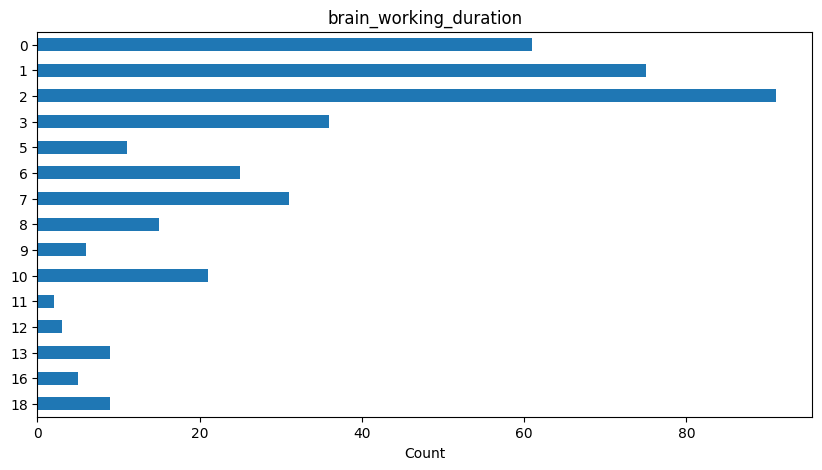

In [25]:
plt.figure(figsize=(10, 5))
(df['brain_working_duration'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('brain_working_duration')
plt.ylabel('')
plt.xlabel('Count')

plt.show()

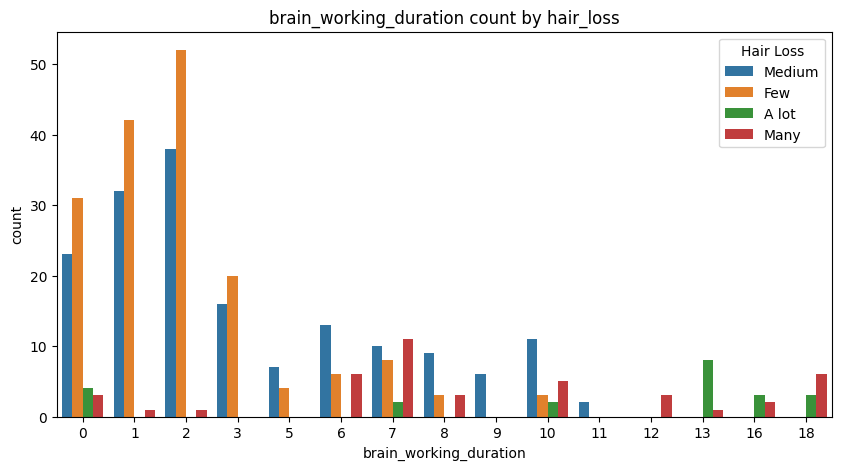

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['brain_working_duration'],hue=df['hair_loss'])
plt.title('brain_working_duration count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('brain_working_duration')

plt.show()

## School_assesssment

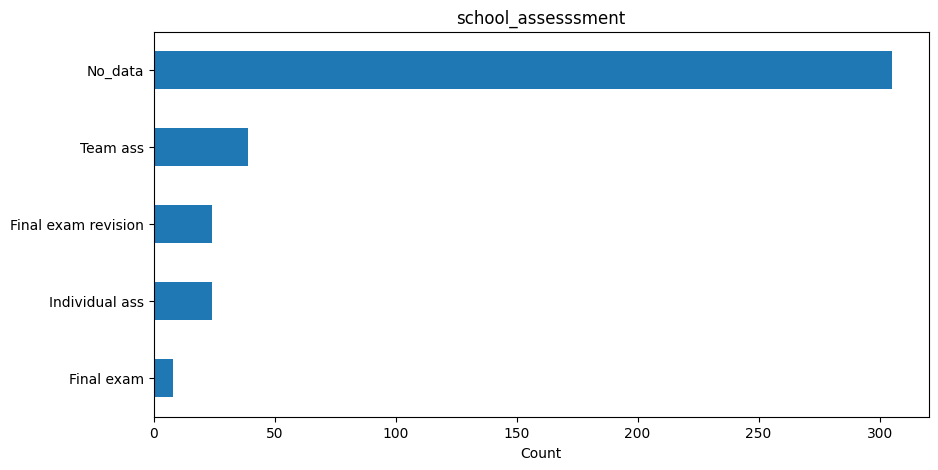

In [27]:
plt.figure(figsize=(10, 5))
(df['school_assesssment'].value_counts().sort_values(ascending=True)).plot(kind='barh')
plt.title('school_assesssment')
plt.ylabel('')
plt.xlabel('Count')

plt.show()

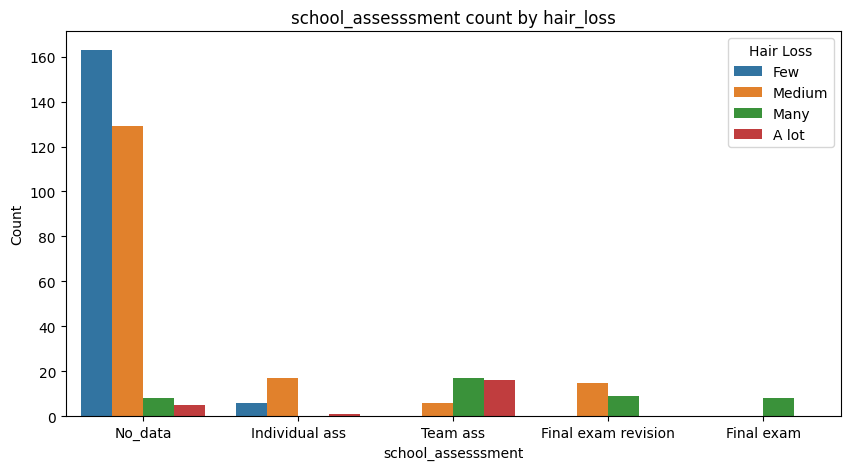

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['school_assesssment'],hue=df['hair_loss'])
plt.title('school_assesssment count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('school_assesssment')
plt.ylabel('Count')

plt.show()

## stress_level

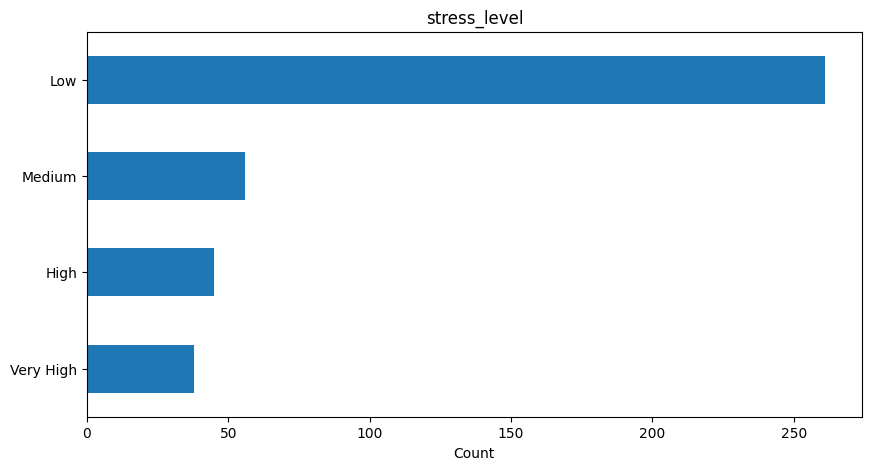

In [29]:
plt.figure(figsize=(10, 5))
(df['stress_level'].value_counts().sort_values(ascending=True)).plot(kind='barh')
plt.title('stress_level')
plt.ylabel('')
plt.xlabel('Count')

plt.show()

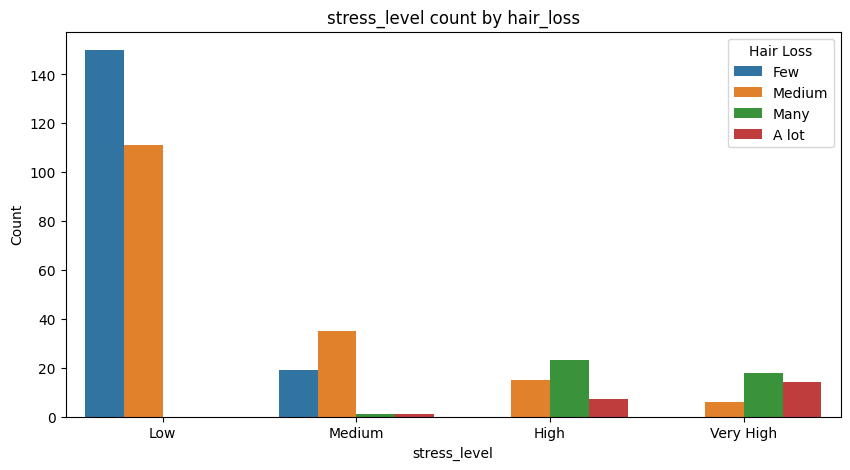

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['stress_level'],hue=df['hair_loss'])
plt.title('stress_level count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('stress_level')
plt.ylabel('Count')

plt.show()

##shampoo_brand

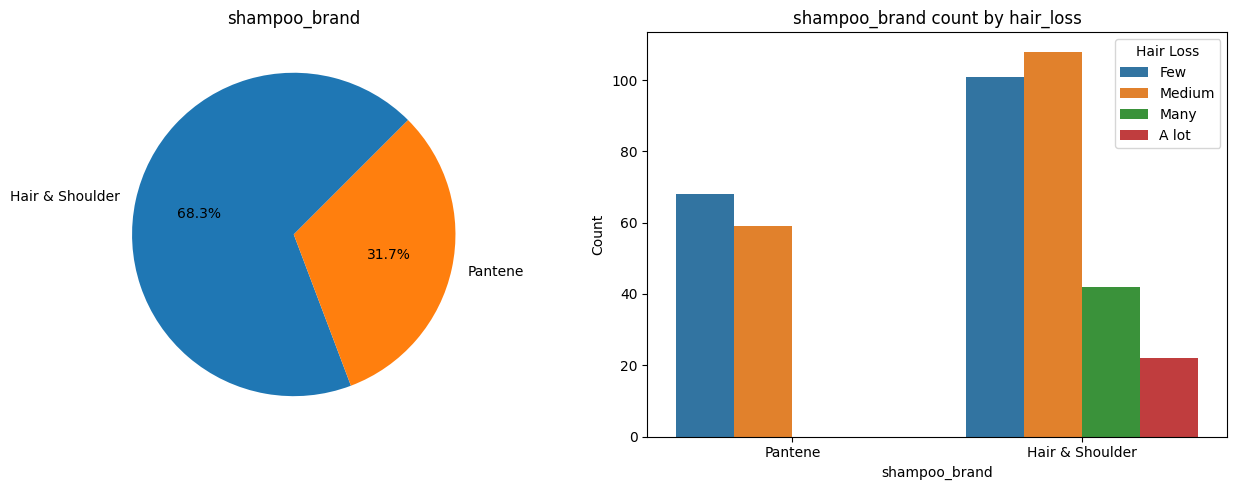

In [31]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.pie(df['shampoo_brand'].value_counts(), labels=df['shampoo_brand'].value_counts().index, autopct='%1.1f%%',startangle=45)
plt.title('shampoo_brand')

plt.subplot(122)
sns.countplot(x=df['shampoo_brand'],hue=df['hair_loss'])
plt.title('shampoo_brand count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('shampoo_brand')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## swimming

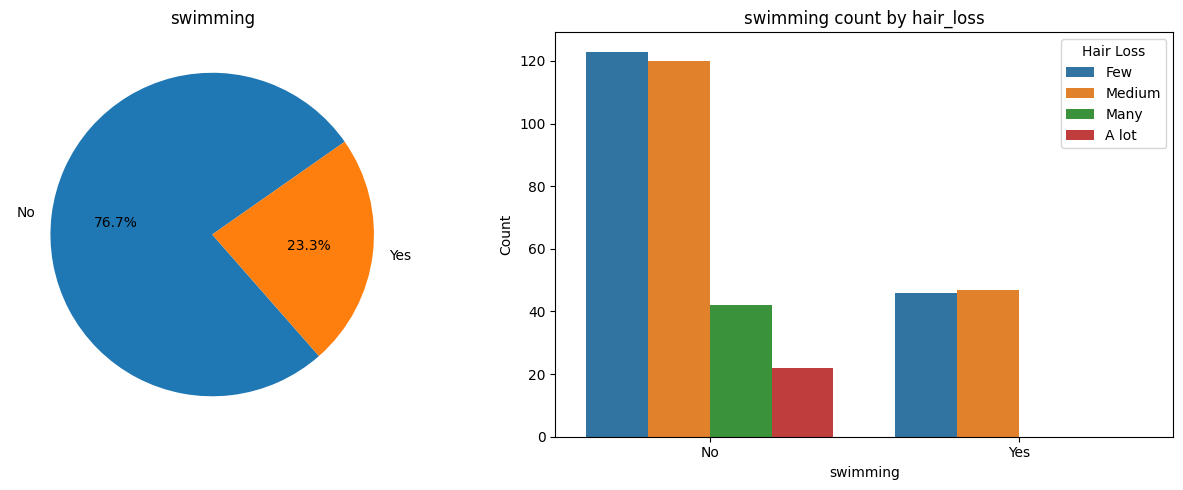

In [32]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.pie(df['swimming'].value_counts(), labels=df['swimming'].value_counts().index, autopct='%1.1f%%',startangle=35)
plt.title('swimming')

plt.subplot(122)
sns.countplot(x=df['swimming'],hue=df['hair_loss'])
plt.title('swimming count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('swimming')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##hair_washing

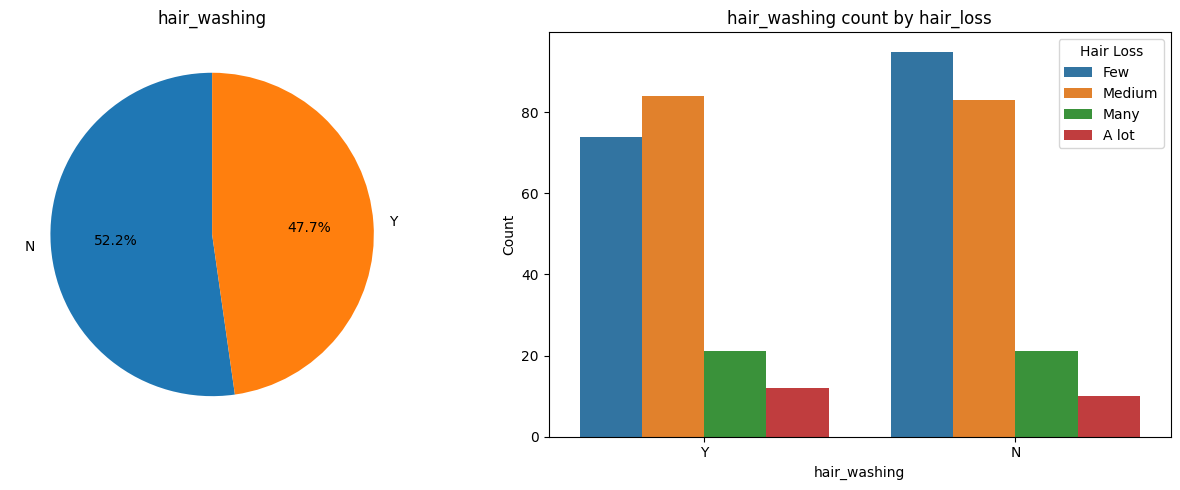

In [33]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.pie(df['hair_washing'].value_counts(), labels=df['hair_washing'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('hair_washing')

plt.subplot(122)
sns.countplot(x=df['hair_washing'],hue=df['hair_loss'])
plt.title('hair_washing count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('hair_washing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## hair_grease

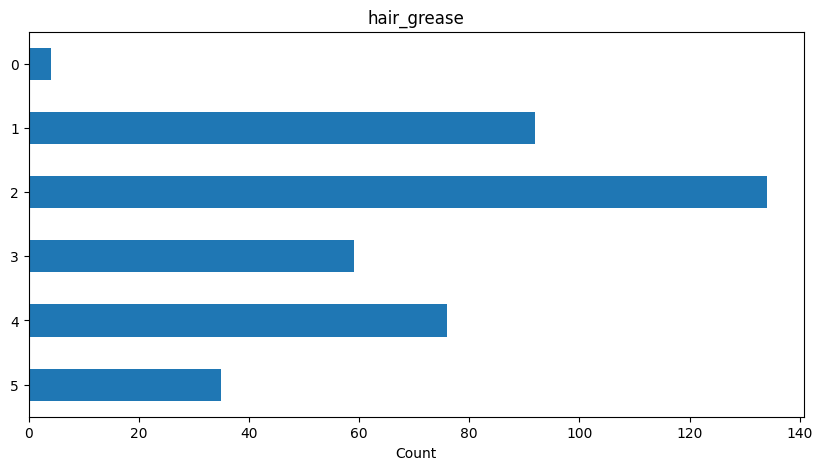

In [34]:
plt.figure(figsize=(10, 5))
(df['hair_grease'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('hair_grease')
plt.ylabel('')
plt.xlabel('Count')

plt.show()

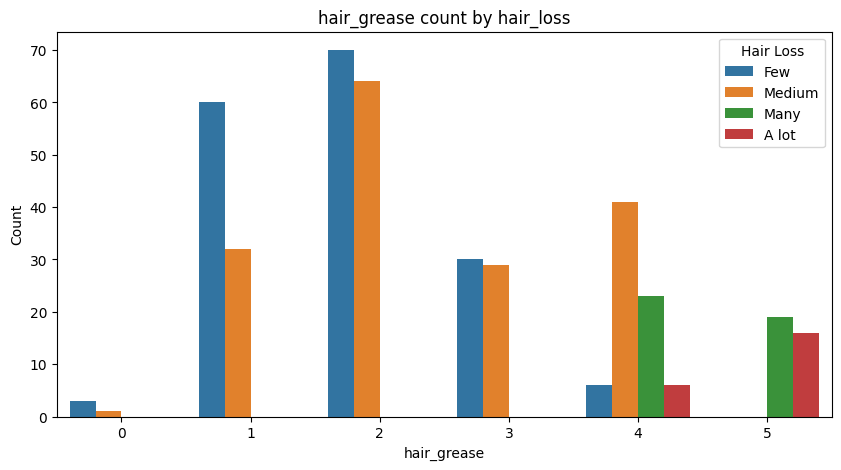

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['hair_grease'],hue=df['hair_loss'])
plt.title('hair_grease count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('hair_grease')
plt.ylabel('Count')

plt.show()

##dandruff

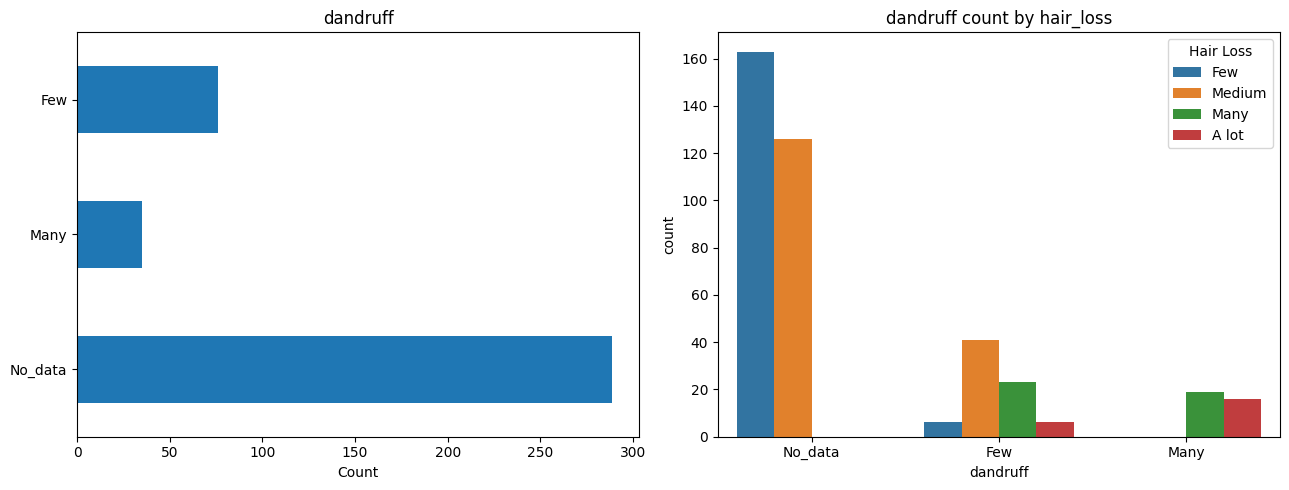

In [36]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
(df['dandruff'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('dandruff')
plt.xlabel('Count')
plt.ylabel('')

plt.subplot(122)
sns.countplot(x=df['dandruff'],hue=df['hair_loss'])
plt.title('dandruff count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('dandruff')

plt.tight_layout()
plt.show()

##libido

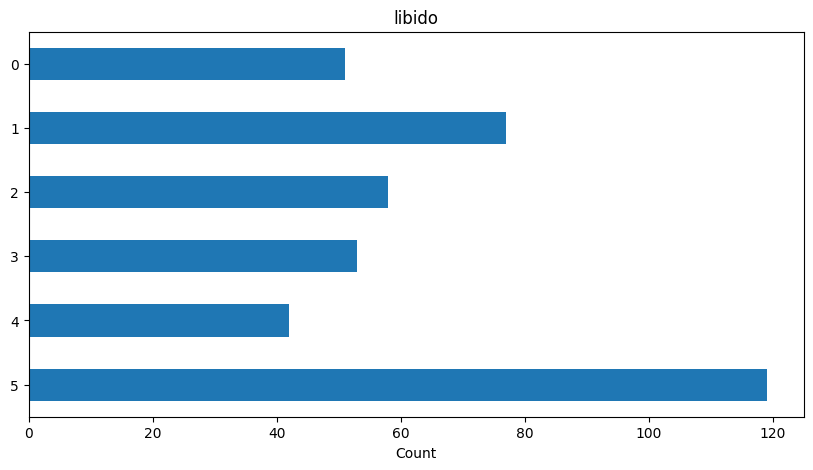

In [37]:
plt.figure(figsize=(10, 5))
(df['libido'].value_counts().sort_index(ascending=False)).plot(kind='barh')
plt.title('libido')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

Text(0.5, 0, 'libido')

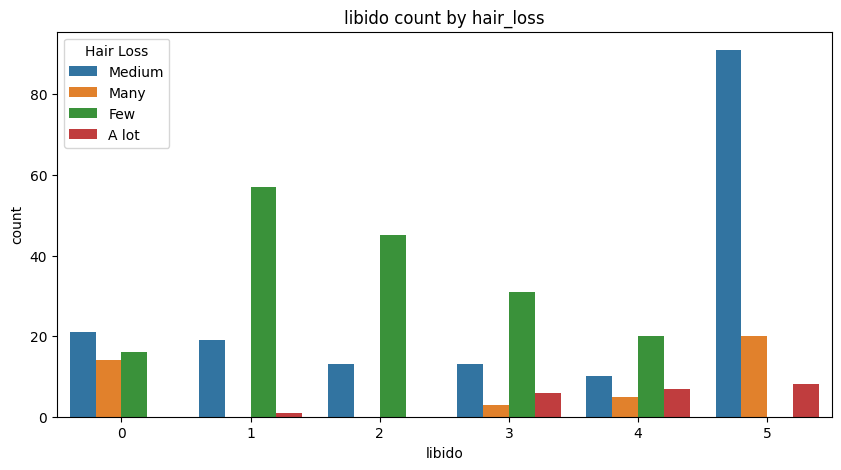

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['libido'],hue=df['hair_loss'])
plt.title('libido count by hair_loss')
plt.legend(title='Hair Loss')
plt.xlabel('libido')



---

# **Preprocessing**

Loại bỏ cột date

In [39]:
date = df['date']
df.drop('date',inplace=True,axis = 1)

Chuyển dữ liệu thành dạng số

In [40]:
hair_loss_map = {
    'Few':0,
    'Medium':1,
    'Many':2,
    'A lot':3
}

pressure_level_map = {
    'Low':0,
    'Medium':1,
    'High':2,
    'Very High':3
}

school_assesssment_map = {
    'No_data': 0,
    'Individual ass': 1,
    'Team ass': 2,
    'Final exam revision': 3,
    'Final exam': 4
}

stress_level_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}

shampoo_brand_map = {
    'Pantene': 0,
    'Hair & Shoulder' : 1
}

swimming_map = {
    'No': 0,
    'Yes' : 1
}

hair_washing_map = {
    'Y': 1,
    'N' : 0
}

dandruff_map = {
    'No_data': 0,
    'Few' : 1,
    'Many' : 2
}

In [41]:
df['hair_loss'] = df['hair_loss'].map(hair_loss_map)
df['pressure_level'] = df['pressure_level'].map(pressure_level_map)
df['school_assesssment'] = df['school_assesssment'].map(school_assesssment_map)
df['stress_level'] = df['stress_level'].map(stress_level_map)
df['shampoo_brand'] = df['shampoo_brand'].map(shampoo_brand_map)
df['swimming'] = df['swimming'].map(swimming_map)
df['hair_washing'] = df['hair_washing'].map(hair_washing_map)
df['dandruff'] = df['dandruff'].map(dandruff_map)

In [42]:
for i in df:
    print(f'{i}: {df[i].unique()}\n')

hair_loss: [0 1 2 3]

stay_up_late: [2 0 3 1 4 5 6 8]

pressure_level: [0 1 2 3]

coffee_consumed: [ 0  1  2  3  4  5  6  7  8  9 10]

brain_working_duration: [ 1  3  0  2  6  7  5  8  9 10 12 13 16 18 11]

school_assesssment: [0 1 2 3 4]

stress_level: [0 1 2 3]

shampoo_brand: [0 1]

swimming: [0 1]

hair_washing: [1 0]

hair_grease: [3 1 2 4 5 0]

dandruff: [0 1 2]

libido: [1 2 3 4 5 0]



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hair_loss               400 non-null    int64
 1   stay_up_late            400 non-null    int64
 2   pressure_level          400 non-null    int64
 3   coffee_consumed         400 non-null    int64
 4   brain_working_duration  400 non-null    int64
 5   school_assesssment      400 non-null    int64
 6   stress_level            400 non-null    int64
 7   shampoo_brand           400 non-null    int64
 8   swimming                400 non-null    int64
 9   hair_washing            400 non-null    int64
 10  hair_grease             400 non-null    int64
 11  dandruff                400 non-null    int64
 12  libido                  400 non-null    int64
dtypes: int64(13)
memory usage: 40.8 KB


Các chỉ số thống kê

In [44]:
df.describe()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,0.792500,1.910000,0.540000,1.162500,3.970000,0.515000,0.650000,0.682500,0.232500,0.477500,2.54000,0.365000,2.787500
std,0.840363,1.611954,0.905788,1.978859,4.215272,1.023422,1.012454,0.466087,0.422955,0.500119,1.29522,0.638588,1.822264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,1.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.00000,0.000000,3.000000
75%,1.000000,3.000000,1.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.00000,1.000000,5.000000
max,3.000000,8.000000,3.000000,10.000000,18.000000,4.000000,3.000000,1.000000,1.000000,1.000000,5.00000,2.000000,5.000000




---

# **Analysis**

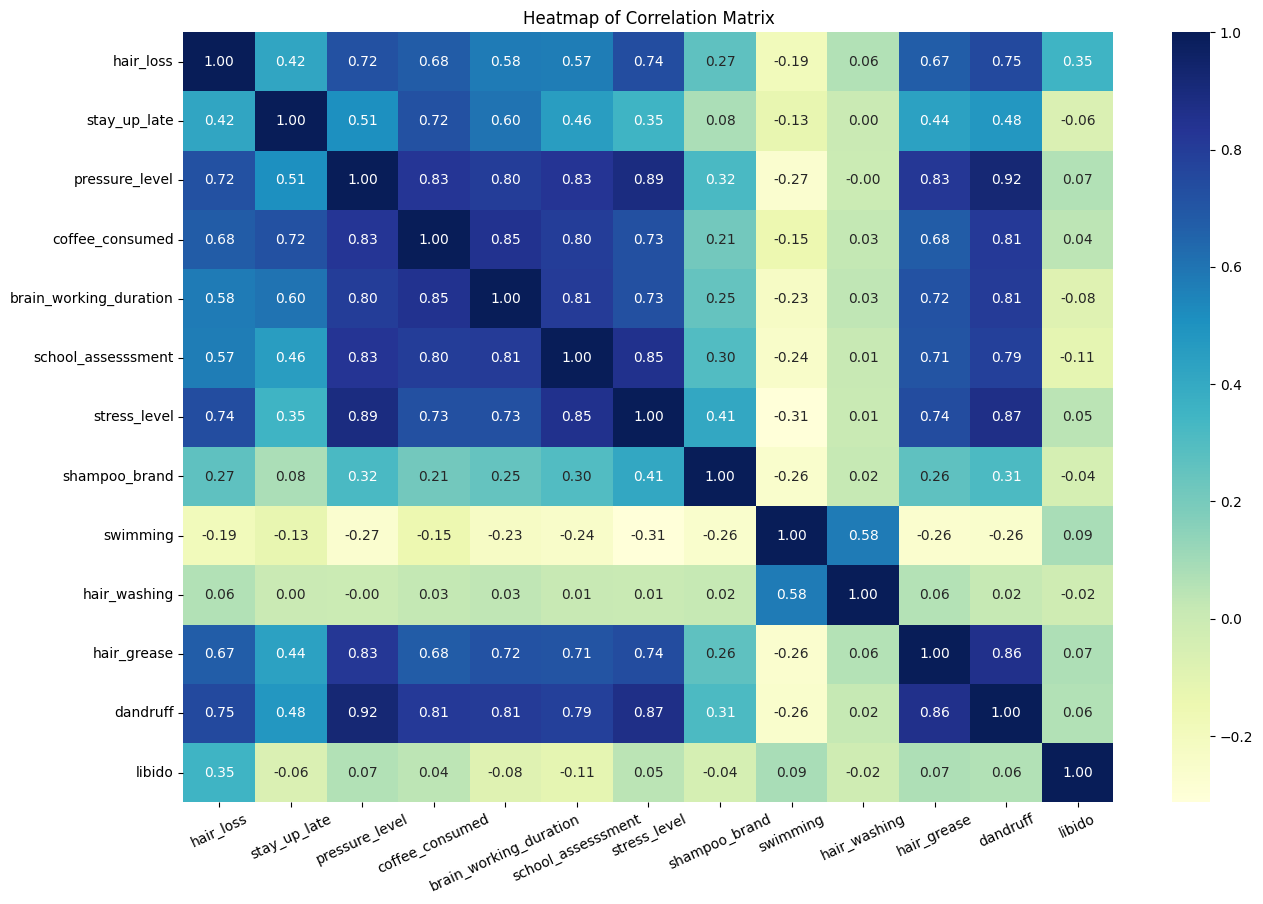

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation= 25)
plt.show()

Text(0.5, 1.0, 'Corrlation with label hair_loss')

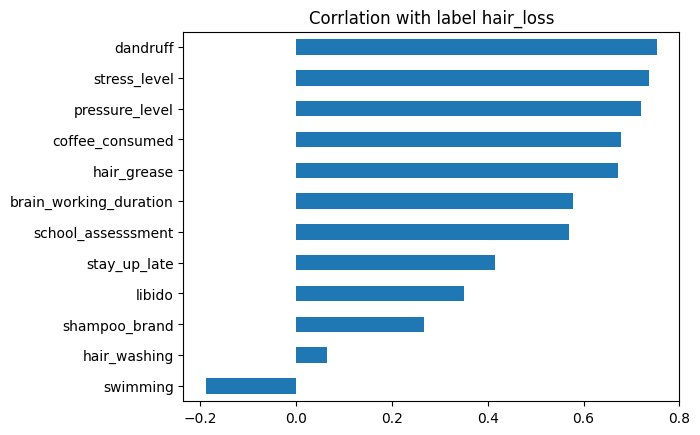

In [46]:
df.corr()['hair_loss'][1:].sort_values().plot(kind='barh')
plt.title('Corrlation with label hair_loss')

In [47]:
X = df.drop('hair_loss', axis=1)
y = df['hair_loss']

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

scores = selector.scores_

total_score = sum(scores)
percentages = (scores / total_score) * 100

selected_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_indices]

print('Top 5 selected features are:')

for feature, percentage in zip(selected_features, percentages):
    print("Feature:", feature)
    print("Percentage influence on hair_loss:", percentage)
    print()

Top 5 selected features are:
Feature: pressure_level
Percentage influence on hair_loss: 3.031766554957429

Feature: coffee_consumed
Percentage influence on hair_loss: 12.153010249953567

Feature: brain_working_duration
Percentage influence on hair_loss: 21.539139929425595

Feature: school_assesssment
Percentage influence on hair_loss: 21.46740941250306

Feature: stress_level
Percentage influence on hair_loss: 11.230594715790543



In [48]:
fea_sl_df = df[['pressure_level','coffee_consumed','brain_working_duration','school_assesssment','stress_level','dandruff','hair_grease']]

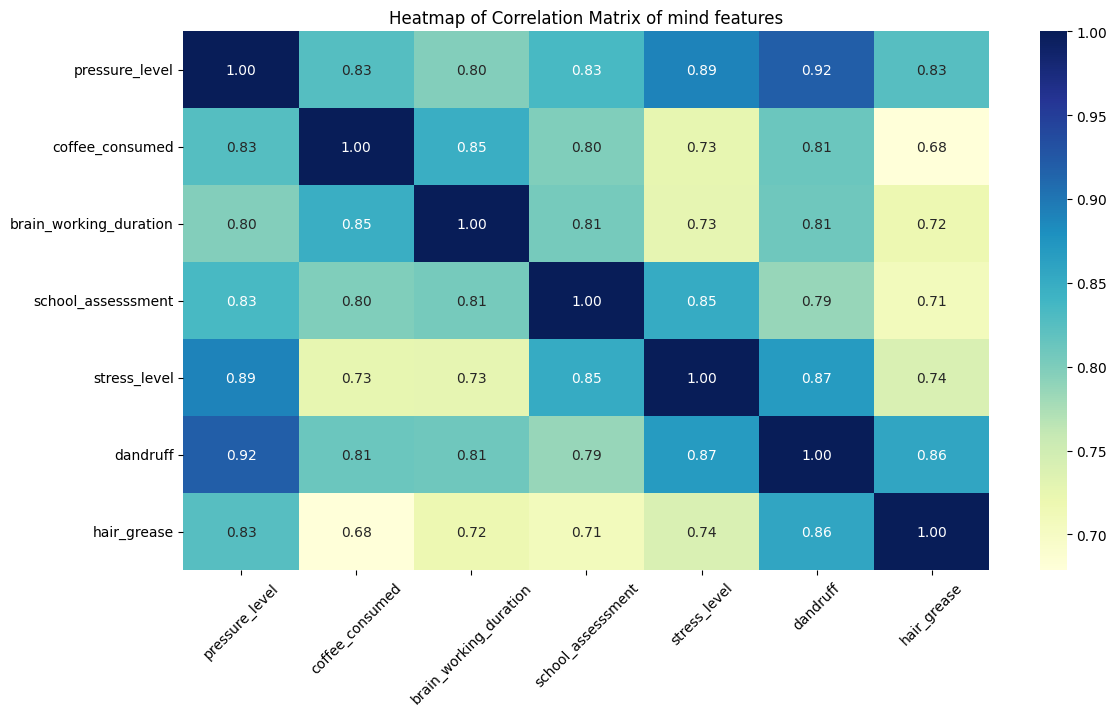

In [49]:
mind_fea = df[['pressure_level','coffee_consumed','brain_working_duration','school_assesssment','stress_level']]

plt.figure(figsize=(13,7))
sns.heatmap(fea_sl_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Correlation Matrix of mind features')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

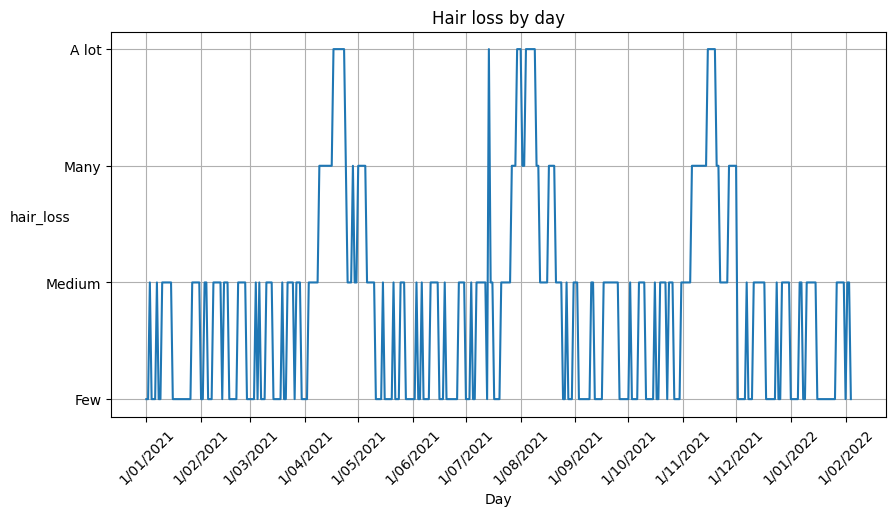

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(date, raw_df['hair_loss'], linestyle='-')
plt.title('Hair loss by day')
plt.xlabel('Day')
plt.ylabel('hair_loss',rotation=0)
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()

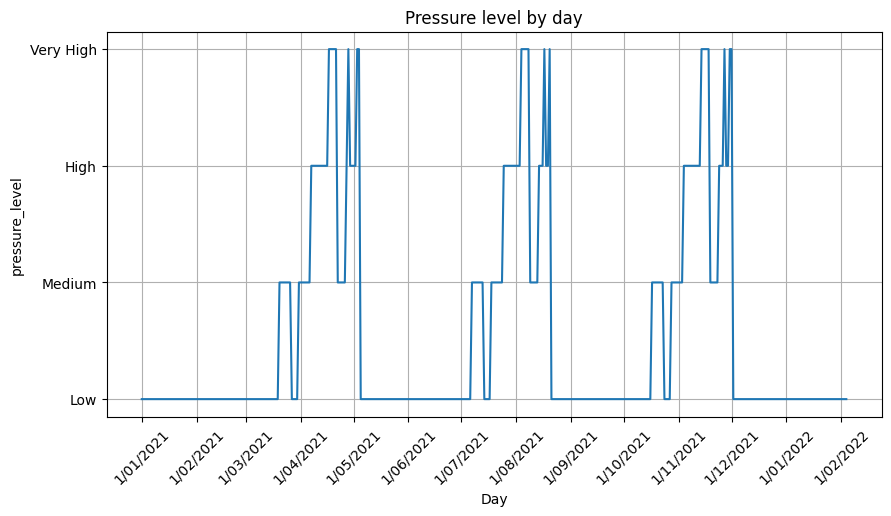

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(date, raw_df['pressure_level'], linestyle='-')
plt.title('Pressure level by day')
plt.xlabel('Day')
plt.ylabel('pressure_level')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()

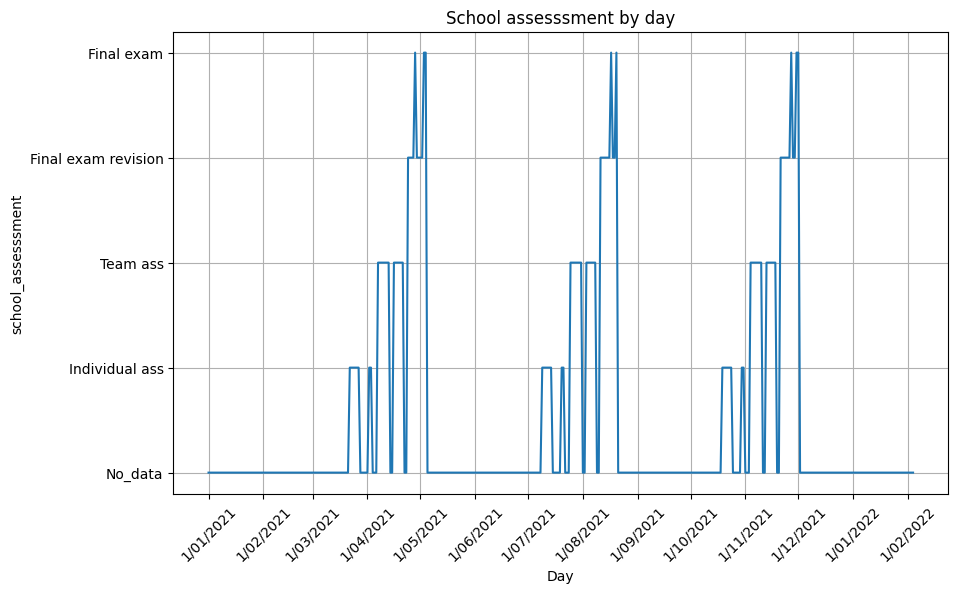

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(date, raw_df['school_assesssment'], linestyle='-')
plt.title('School assesssment by day')
plt.xlabel('Day')
plt.ylabel('school_assesssment')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()

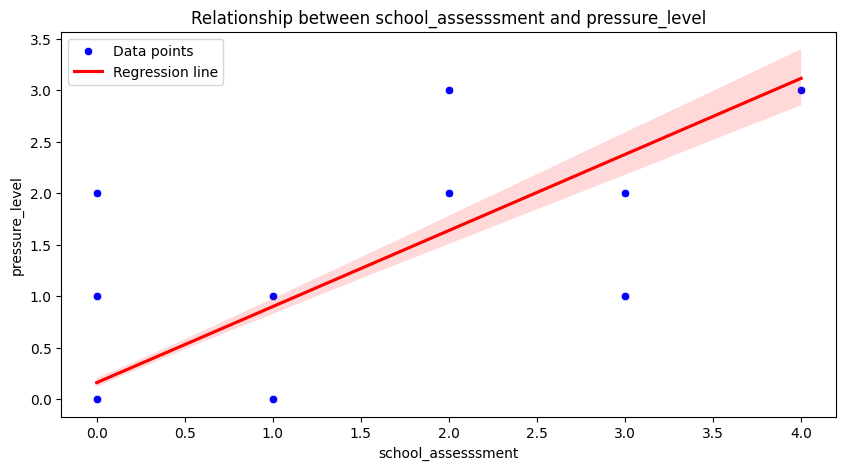

In [53]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='school_assesssment', y='pressure_level', color='blue', label='Data points')
sns.regplot(data=df, x='school_assesssment', y='pressure_level', scatter=False, color='red', label='Regression line')
plt.title('Relationship between school_assesssment and pressure_level')
plt.xlabel('school_assesssment')
plt.ylabel('pressure_level')
plt.legend()
plt.show()

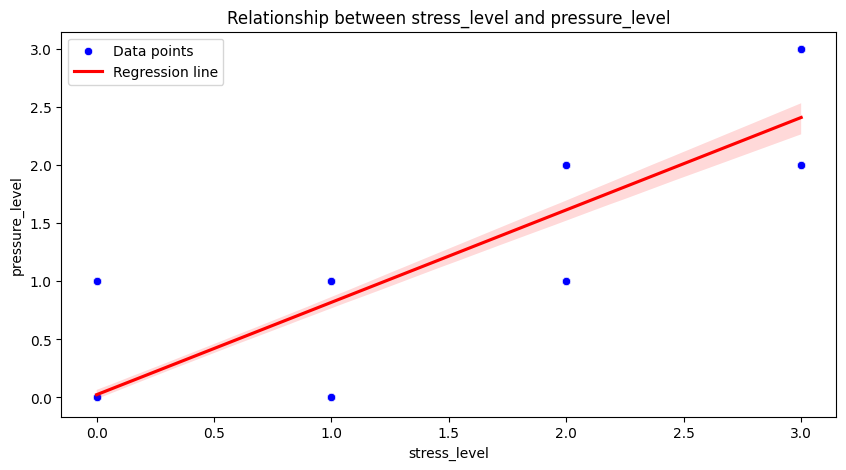

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='stress_level', y='pressure_level', color='blue', label='Data points')
sns.regplot(data=df, x='stress_level', y='pressure_level', scatter=False, color='red', label='Regression line')
plt.title('Relationship between stress_level and pressure_level')
plt.xlabel('stress_level')
plt.ylabel('pressure_level')
plt.legend()
plt.show()

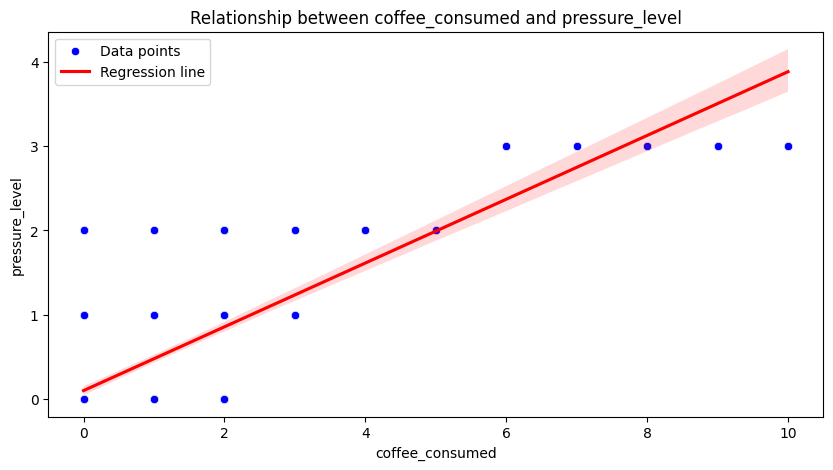

In [55]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='coffee_consumed', y='pressure_level', color='blue', label='Data points')
sns.regplot(data=df, x='coffee_consumed', y='pressure_level', scatter=False, color='red', label='Regression line')
plt.title('Relationship between coffee_consumed and pressure_level')
plt.xlabel('coffee_consumed')
plt.ylabel('pressure_level')
plt.legend()
plt.show()

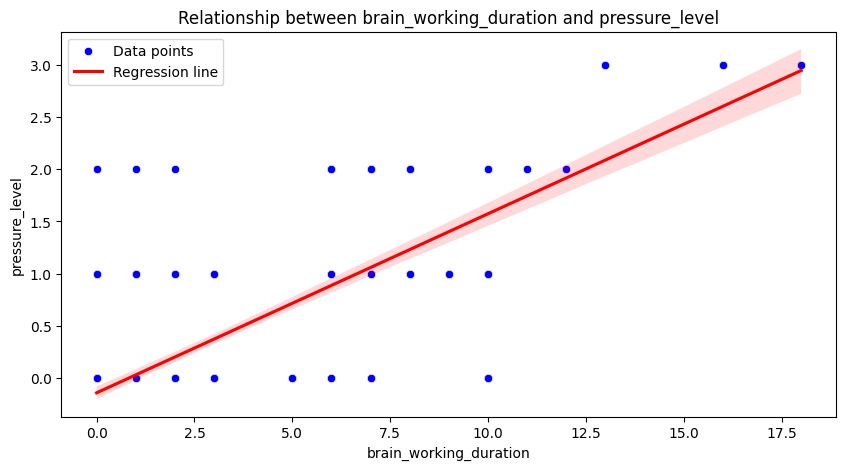

In [56]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='brain_working_duration', y='pressure_level', color='blue', label='Data points')
sns.regplot(data=df, x='brain_working_duration', y='pressure_level', scatter=False, color='red', label='Regression line')
plt.title('Relationship between brain_working_duration and pressure_level')
plt.xlabel('brain_working_duration')
plt.ylabel('pressure_level')
plt.legend()
plt.show()

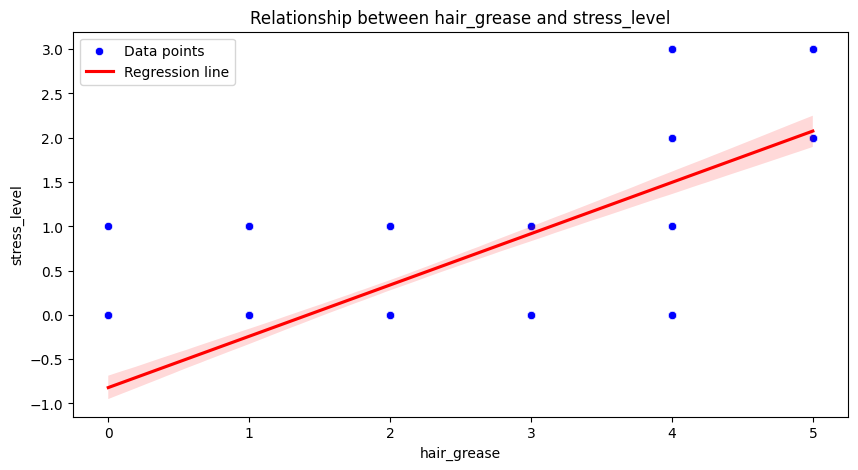

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='hair_grease', y='stress_level', color='blue', label='Data points')
sns.regplot(data=df, x='hair_grease', y='stress_level', scatter=False, color='red', label='Regression line')
plt.title('Relationship between hair_grease and stress_level')
plt.xlabel('hair_grease')
plt.ylabel('stress_level')
plt.legend()
plt.show()

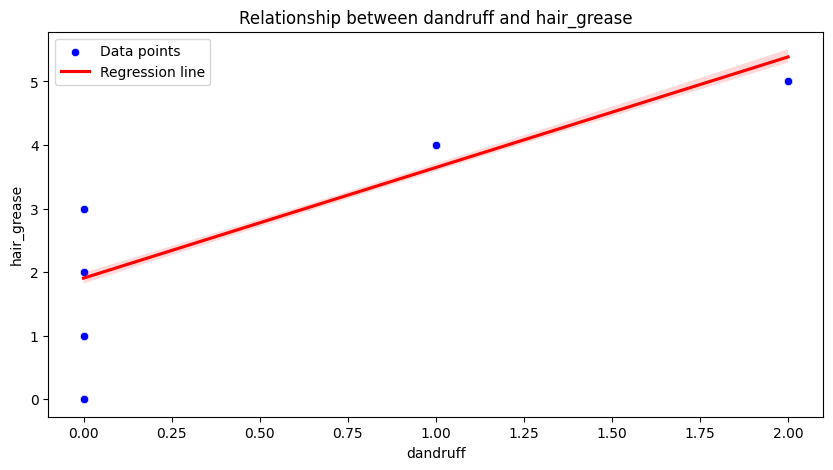

In [58]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='dandruff', y='hair_grease', color='blue', label='Data points')
sns.regplot(data=df, x='dandruff', y='hair_grease', scatter=False, color='red', label='Regression line')
plt.title('Relationship between dandruff and hair_grease')
plt.xlabel('dandruff')
plt.ylabel('hair_grease')
plt.legend()
plt.show()

#**Modeling using Oversampling + Feature selection**

In [59]:
features = df.drop('hair_loss', axis=1)
labels = df['hair_loss']

In [60]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, labels)

df_resampled = pd.concat([ pd.DataFrame(labels_resampled, columns=['hair_loss']),
                          pd.DataFrame(features_resampled, columns=features.columns)], axis=1)


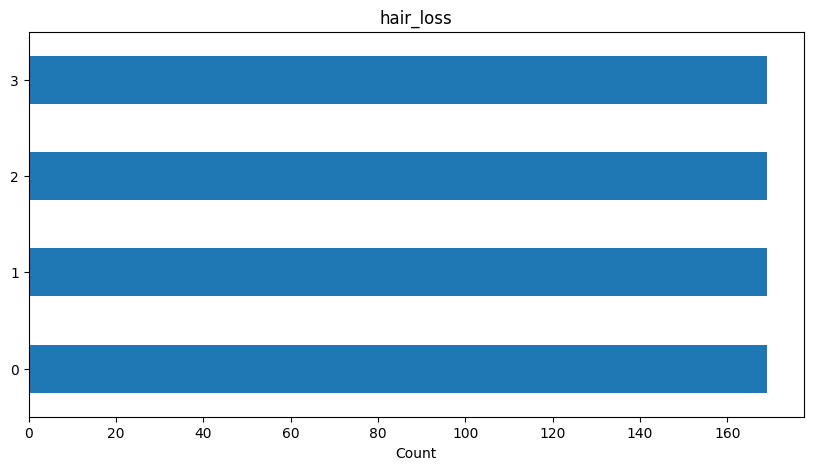

In [61]:
plt.figure(figsize=(10, 5))
(df_resampled['hair_loss'].value_counts().sort_values(ascending=True)).plot(kind='barh')
plt.title('hair_loss')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Data resampled corlation with hair_loss')

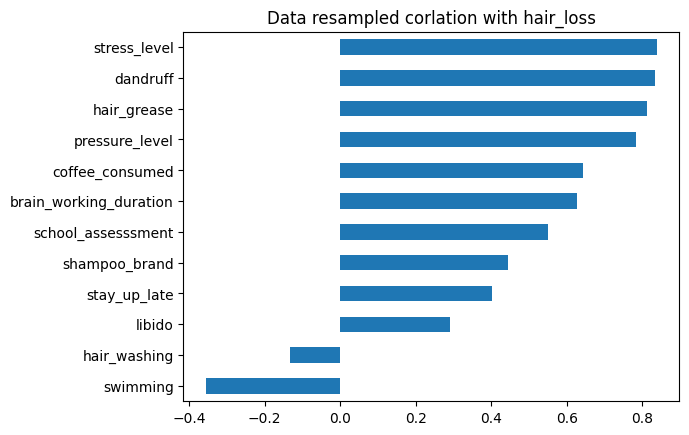

In [62]:
df_resampled.corr()['hair_loss'][1:].sort_values().plot(kind='barh')
plt.title('Data resampled corlation with hair_loss')

In [63]:
X = df_resampled.drop('hair_loss', axis=1)
y = df_resampled['hair_loss']

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

scores = selector.scores_

total_score = sum(scores)
percentages = (scores / total_score) * 100

selected_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_indices]

print('5 selected features are:')
for feature, percentage in zip(selected_features, percentages):
  print("Feature:", feature)
  print("Percentage influence on hair_loss:", percentage)
  print()

5 selected features are:
Feature: pressure_level
Percentage influence on hair_loss: 4.2002134823740604

Feature: coffee_consumed
Percentage influence on hair_loss: 10.536520133243744

Feature: brain_working_duration
Percentage influence on hair_loss: 19.370083809695977

Feature: school_assesssment
Percentage influence on hair_loss: 26.692672666874767

Feature: stress_level
Percentage influence on hair_loss: 9.526339573113326



In [64]:
fea_df_resampled = df_resampled[['pressure_level','coffee_consumed','brain_working_duration','school_assesssment','stress_level','dandruff','hair_grease']]

In [65]:
X = fea_df_resampled
y = df_resampled['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [66]:
model = LogisticRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=20)

accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [67]:
print("Accuracy scores:", accuracy_scores)
print("Average accuracy:", np.mean(accuracy_scores))

Accuracy scores: [0.81617647 0.87407407 0.88148148 0.82222222 0.82222222]
Average accuracy: 0.843235294117647


# **Tổng kết**
1. **Bộ dữ liệu rất mang tính chủ quan của người ghi nhận dữ liệu(các mức đánh giá) và mô hình dự đoán chỉ thực sự có ý nghĩa đối với người ghi nhận dữ liệu**

2. dandruff và stress_level ảnh hưởng nhiều đến việc rụng tóc

3. pressure_level tuy không trực tiếp gây rụng nhưng là trung gian tới các tác nhân gây rụng tóc

4. mức độ áp lực của công việc và tình trạng sức khoẻ ảnh hưởng đến việc rụng tóc